# REFERENCES:
    https://towardsdatascience.com/youtube-views-predictor-9ec573090acb
    https://github.com/allenwang28/YouTube-Virality-Predictor/blob/master/notebooks/Data%20Exploration%20-%20Time%20Based.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
df = pd.read_excel('D:/knowledge/college docs/DSP/Project2/FinalVideoListCommentPrevInfo_1.xlsx')

In [3]:
df.describe()

,CategoryID,CHViewCount,CHSubscriberCount,CHAge,CHVideoCount,Duration,ViewCount,LikeCount,DislikeCount,FavouriteCount,...,Comm_count_ng2,Comm_count_n2,Comm_count_p7,Comm_count_ng7,Comm_count_n7,PView,PLike,PComments,PDislike,PFavorite
count,3405.000000,3.405000e+03,3.405000e+03,3405.000000,3405.000000,3405.000000,3.405000e+03,3405.000000,3405.000000,3405.0,...,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3.405000e+03,3405.000000,3405.000000,3405.000000,3405.0
mean,22.780029,1.209259e+08,7.275229e+05,506.190015,253.250514,540.780617,2.320542e+05,4178.070485,187.382673,0.0,...,0.330690,0.942731,2.746843,0.470778,1.343906,2.307779e+05,4132.976211,473.560940,184.938620,0.0
std,4.533666,2.362366e+08,1.425873e+06,742.769687,167.003373,1277.610758,9.966875e+05,14244.568294,877.599342,0.0,...,0.893843,1.826962,3.929377,1.103933,2.296109,9.967308e+05,14233.156770,1851.352609,876.333031,0.0
min,1.000000,3.386900e+04,0.000000e+00,16.000000,16.000000,7.000000,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0
25%,22.000000,2.565808e+06,1.483800e+04,134.000000,118.000000,216.000000,1.932000e+03,29.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.604000e+03,27.000000,4.000000,1.000000,0.0
50%,24.000000,1.536434e+07,5.994500e+04,265.000000,216.000000,387.000000,1.383400e+04,197.000000,12.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.301000e+04,184.000000,35.000000,11.000000,0.0
75%,26.000000,1.469566e+08,8.863590e+05,513.000000,345.000000,651.000000,1.119210e+05,2447.000000,85.000000,0.0,...,0.000000,1.000000,4.000000,0.000000,2.000000,1.105130e+05,2360.000000,233.000000,82.000000,0.0
max,29.000000,1.277878e+09,7.034479e+06,5101.000000,629.000000,40819.000000,3.404457e+07,239376.000000,30144.000000,0.0,...,10.000000,13.000000,20.000000,11.000000,13.000000,3.404457e+07,239376.000000,36166.000000,30144.000000,0.0


In [4]:
uniqueCategoryID = list(set(df['CategoryID'].tolist()))

In [5]:
uniqueCategoryID

[1, 2, 10, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29]

# Feature Engineering and Removing potential Outliers

In [6]:
from datetime import datetime
from dateutil.parser import parse

def convert_to_days(dt):
    d=parse(dt)
    a=d.strftime('%m/%d/%Y')
    x=datetime.strptime(a, '%m/%d/%Y').date()
    y=datetime.now().date()
    days=((y-x).days)
    return days

In [7]:
AgeVideo = []
for i in df['PublishedDate']:
    AgeVideo.append(convert_to_days(str(i)))
    
df['AgeVideo'] = AgeVideo

In [8]:
df['AgeVideo'][df['AgeVideo']<700].count()

3058

In [9]:
df['AgeVideo'][df['AgeVideo']>30].count()

2786

In [10]:
df = df[df['AgeVideo']>30]

In [11]:
df = df[df['AgeVideo']<700]

In [12]:
df.shape

(2439, 33)

In [13]:
df['ViewCount'][df['ViewCount']>100000].count()

692

In [14]:
df = df[df['ViewCount']<100000]

In [15]:
df.shape

(1747, 33)

In [16]:
df['ViewCount'][df['ViewCount']==0].count()

0

In [17]:
df = df[df['ViewCount']!=0]

In [18]:
df = df[df['PView'] > 0]
df = df[df['ViewCount'] > 0]
df['Views-Difference'] = df['ViewCount'] - df['PView']
df['Views-PercentChange'] = df['Views-Difference'] / df['PView'].astype(np.float)
df.dropna()

,VideoID,Title,Description,Thumbnail,PublishedDate,CategoryID,ChannelID,ChannelTitle,CHViewCount,CHSubscriberCount,...,Comm_count_ng7,Comm_count_n7,PView,PLike,PComments,PDislike,PFavorite,AgeVideo,Views-Difference,Views-PercentChange
0,5DkbjsjN1zA,Broccoli Apple Salad | Healthy Fruit & Vegetab...,Broccoli Apple Salad is a healthy combination ...,https://i.ytimg.com/vi/5DkbjsjN1zA/default.jpg,2017-08-31,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,0,2056,58,16,4,0,244,2232,1.085603
1,DGNCqPpwMyE,Homemade Creamy Italian Dressing Recipe,Homemade Creamy Italian Dressing Recipe is so ...,https://i.ytimg.com/vi/DGNCqPpwMyE/default.jpg,2017-08-14,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,0,3837,109,25,2,0,261,-1781,-0.464165
2,OU4sVtChkro,Low Carb Chilli Chicken Recipe | Low Carb Recipe,Low Carb Chilli Chicken Recipe is a low carb v...,https://i.ytimg.com/vi/OU4sVtChkro/default.jpg,2017-08-08,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,1,1,739,58,18,1,0,267,3098,4.192152
3,0vU6-VHnDWc,Low Carb Buns Recipe,Low Carb Buns Recipe is about how to make low ...,https://i.ytimg.com/vi/0vU6-VHnDWc/default.jpg,2017-07-31,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,1,1089,64,17,0,0,275,-350,-0.321396
4,kCr_EJDMciM,Cheddar Jalapeño Muffins Recipe | Low Carb Recipe,Cheddar Jalapeño Muffins Recipe is a low carb ...,https://i.ytimg.com/vi/kCr_EJDMciM/default.jpg,2017-07-19,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,1,709,33,23,0,0,287,380,0.535966
5,xU9ccoTzo-o,Spicy Nacho Chicken Recipe | Low Carb Recipe,Spicy Nacho Chicken Recipe is a spicy low carb...,https://i.ytimg.com/vi/xU9ccoTzo-o/default.jpg,2017-07-11,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,1,0,7074,201,28,3,0,295,-6365,-0.899774
6,i7x6wPhwTL4,Zucchini Fritters Recipe | Low Carb Recipe,Zucchini Fritters Recipe | Low Carb Recipe is ...,https://i.ytimg.com/vi/i7x6wPhwTL4/default.jpg,2017-07-06,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,1,1,2832,51,15,2,0,300,4242,1.497881
7,K4sUrnHJGA0,Brussels Sprouts Salad Recipe | Healthy Recipe,Brussels Sprouts Salad Recipe is a healthy com...,https://i.ytimg.com/vi/K4sUrnHJGA0/default.jpg,2017-06-30,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,1,6265,126,17,1,0,306,-3433,-0.547965
8,lU_mOurUZr4,Roasted Cauliflower Recipe ~ Low Carb,"Roasted Cauliflower Recipe is low carb, health...",https://i.ytimg.com/vi/lU_mOurUZr4/default.jpg,2017-06-27,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,2,1799,51,34,0,0,309,4466,2.482490
9,bFhPr5LwUFU,Best Oven Baked Country Ribs~Low Carb,How to make the Best Oven Baked Country Ribs. ...,https://i.ytimg.com/vi/bFhPr5LwUFU/default.jpg,2017-06-22,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,2,3077,46,18,5,0,314,-1278,-0.415340


In [19]:
df = df[df['Views-PercentChange'] < 100]

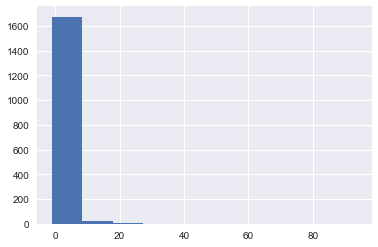

In [20]:
df["Views-PercentChange"].hist()
plt.show()

In [21]:
df['Views-PercentChange'][df['Views-PercentChange']==0].count()

293

In [22]:
df = df[df['Views-PercentChange']>0]

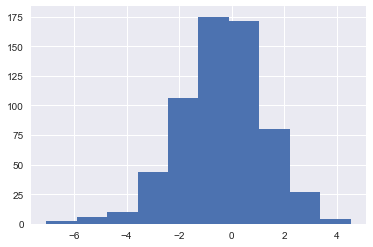

In [23]:
df['Views-PercentChange'].apply(np.log).hist()

In [24]:
df['logViewsPercentChange']=df['Views-PercentChange'].apply(np.log)

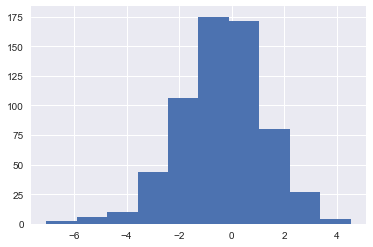

In [25]:
df['logViewsPercentChange'].hist()

# Models

# 1. GradientBoostingRegressor

Features include count of sentiment after 2 days of video being published

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import MinMaxScaler

In [57]:
gbrcolumns = ['CHSubscriberCount', 'CHVideoCount', 'CHViewCount','CHAge','PComments',
              'PDislike', 'PLike', 'PView','LikeCount','Duration']
X_dfgrb = df[gbrcolumns]
y_dfgrb = df['logViewsPercentChange']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb, y_dfgrb, test_size=0.2)

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','random_state':42 }
grbreg = GradientBoostingRegressor(**params)
grbreg.fit(X_train, y_train)
#print("R^2: {0}").format(reg.score(X_test, y_test))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [59]:
grbreg.score(X_test, y_test)

0.46686469110622292

In [60]:
mse = mean_squared_error(y_test, grbreg.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 1.6297
